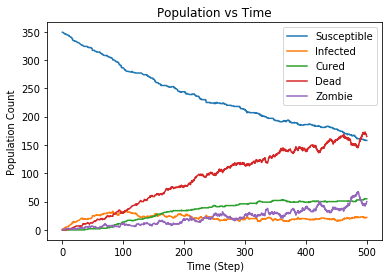

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

### input parameters ####################

# int; total population
N = 350

# float; maximum elapsed time
T = 500

# float; start time
t = 0.0

# float; spatial parameter
V = 100.0

# float; rate of infection after contact
alpha = 0.2

# float; rate of cure
beta = 0.8

# float; rate of becoming susceptible again
gamma = 0.2

# float; rate of dead becoming zombie
delta = 1.0

# float; rate of zombie infecting human
nato = 0.1

# float; rate of infected dying
epsilon = 1

charlie = 0.02

# int; initial infected population
n_I = 1

#########################################

# set input parameters to numpy words
N = np.int64(N)
T = np.float(T)
t = np.float(t)
V = np.float64(V)
alpha = np.float64(alpha)
beta = np.float64(beta)
n_I = np.int64(n_I)
n_D = np.int64(0)
n_Z = np.int64(0)

# compute susceptible population, set recovered to zero
n_S = N - n_I
n_R = np.int64(0)

# events

def infection():
    global n_S, n_I
    n_S = n_S - 1
    n_I = n_I + 1

def recovered():
    global n_I, n_R
    n_I = n_I - 1
    n_R = n_R + 1

def death():
    global n_D, n_I
    n_D = n_D + 1
    n_I = n_I - 1
    
def bitten():
    global n_Z, n_S, n_I, n_R
    n_Z = n_Z + 1
    event = np.random.random_sample()
    t = n_S + n_I + n_R
    sum_a = 0
    idx = [n_S, n_I, n_R]
    i = math.floor(event*len(idx))
    idx[i] = idx[i] - 1

def zombified():
    global n_Z, n_D
    n_Z = n_Z + 1
    n_D = n_D - 1

def resusceptible():
    global n_S, n_R
    n_S = n_S + 1
    n_R = n_R - 1

def kill():
    global n_D, n_Z
    n_Z = n_Z - 1
    n_D = n_D + 1
    
# initialize results list
SIR_data = []
SIR_data.append((t, n_S, n_I, n_R, n_D, n_Z))

# main loop
while t < T:

    # if n_I == 0:
        # break

    w1 = alpha * n_S * n_I / V # Infected
    w2 = beta * n_I / V           # Recovered
    w3 = gamma * n_R / V           # Resusceptible
    w4 = delta * n_D / V          # zombified
    w5 = epsilon * n_I / V
    w6 = nato * n_S / V
    w7 = charlie * n_Z * (n_S+n_I+n_R) / V
    W = w1 + w2 + w3 + w4 + w5 + w6 + w7

    dt = -np.log(np.random.random_sample()) / W
    t = t + dt

    event = np.random.random_sample()
    sum_a = 0
    idx = 0

    actions = [infection, recovered, resusceptible, zombified, death, bitten, kill]
    for w in [w1,w2,w3,w4,w5,w6,w7]:
        if  sum_a / W <= event < (sum_a + w) / W:
            actions[idx]()
            break
        else:
            idx += 1
            sum_a += w


    SIR_data.append((t, n_S, n_I, n_R, n_D, n_Z))
    # print((t, n_S, n_I, n_R, n_D, n_Z))

with open('SIR_data.txt', 'w+') as fp:
    fp.write('\n'.join('%f %i %i %i %i %i' % x for x in SIR_data))

data = [list(t) for t in zip(*SIR_data)]
plt.plot(data[0], data[1])
plt.plot(data[0], data[2])
plt.plot(data[0], data[3])
plt.plot(data[0], data[4])
plt.plot(data[0], data[5])
plt.title("Population vs Time")
plt.legend(["Susceptible", "Infected", "Cured", "Dead", "Zombie"],)
plt.xlabel("Time (Step)")
plt.ylabel("Population Count")
plt.show()